In [3]:
import function_list
import os
base_path,data_path,output = function_list.folder_setup()

In [50]:
os.chdir(data_path)
beds = pd.read_csv('bed_size.csv')
os.chdir(output)

In [52]:
#sort descending by Area
beds = beds.sort_values(by='Area',ascending=False).reset_index(drop=True)

In [54]:
bed_1 = [0,1,2,3,4,5,7,8,10,11]
bed_2 = [6,9]


In [57]:
beds

,Bed,Width,Length,Area,Color,Alt_Color,Standard Size,http://www.sizechart.com/home/bed-size/us/index.html
0,Texas King,80,98,7840,#b15928,#b15928,No,NaN
1,King,76,80,6080,#6a3d9a,#969696,Yes,NaN
2,Cal King,72,84,6048,#ffff99,#969696,Yes,NaN
3,Super Queen,66,80,5280,#cab2d6,#cab2d6,No,NaN
4,Queen,60,80,4800,#ff7f00,#969696,Yes,NaN
5,Full XL,54,80,4320,#fdbf6f,#fdbf6f,No,NaN
6,Full,54,75,4050,#e31a1c,#969696,Yes,NaN
7,Three Quarter,48,75,3600,#fb9a99,#969696,Yes,NaN
8,Twin-XL,39,80,3120,#33a02c,#33a02c,No,NaN
9,Twin,39,75,2925,#b2df8a,#969696,Yes,NaN


## To-Do
* Add annotations
* Consider alt colors
* Add source info

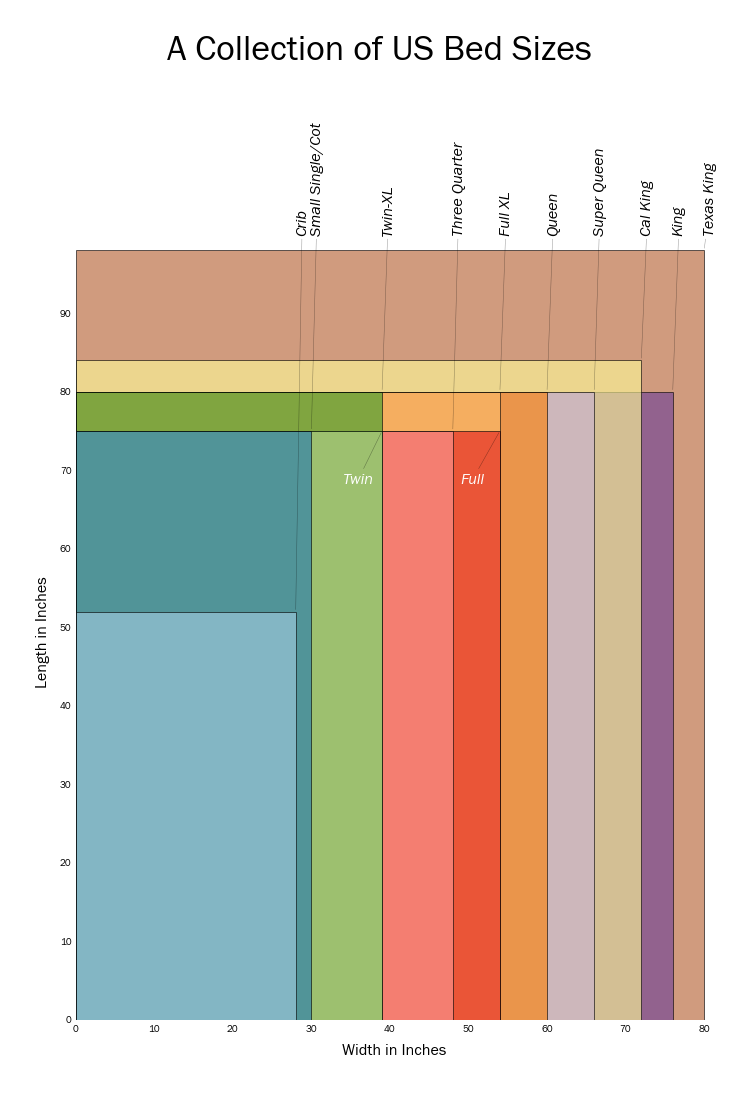

In [123]:
#Create chart

fig = figure(figsize=(16,16))

fig.suptitle('A Collection of US Bed Sizes',fontsize=36)

ax = fig.add_subplot(111,aspect='equal')

plt.subplots_adjust(top=.8)

for item in range(len(beds)):
    ax.add_patch(patches.Rectangle((0,0),
               width=beds['Width'][item],edgecolor='black',
               height=beds['Length'][item],alpha=.6,facecolor=beds['Color'][item],zorder=beds.index[item]))
    
for item in bed_1:
    ax.annotate(beds['Bed'][item],xy=(beds['Width'][item],beds['Length'][item]),
            xytext=(beds['Width'][item],100),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3",alpha=.4,linewidth=.5),
                ha='left',va='bottom',rotation=90,style='italic',zorder=10,fontsize=16)
    
for item in (6,9):    
    ax.annotate(beds['Bed'][item],xy=(beds['Width'][item],beds['Length'][item]),fontsize=16,
                arrowprops=dict(arrowstyle="-",connectionstyle="arc3",alpha=.4,linewidth=.5),
    xytext=(beds['Width'][item]-5,68),
                ha='left',va='bottom',rotation=0,style='italic',color='White',zorder=14)
    

    
ax.set_xlim(0,beds['Width'].max()+1)
ax.set_ylim(0,beds['Length'].max()+1)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.set_xlabel('Width in Inches',fontsize=16)
ax.set_ylabel('Length in Inches',fontsize=16)

ax.grid(False)

In [29]:
beds.columns.values

array(['Bed', 'Width', 'Length', 'Area', 'Color', 'Alt_Color',
       'Standard Size',
       'http://www.sizechart.com/home/bed-size/us/index.html'], dtype=object)